## Probability

#### Class Objectives

- Understand the sample space
- Probability operations
- Permutations and Combinations
- Bayes theorem

In [1]:
from random import choice
from matplotlib import pyplot as plt
from math import factorial
import pandas as pd

In [2]:
# A fair coin
ss = ["H", "T"]
## P(A) = outcomes/total_outcomes
# P("H")
p_h = ss.count("H")/len(ss)
p_h

0.5

In [3]:
res = {}
for n in [1,2,10,25,100,1000,5000]:
    for _ in range(n):
        c = choice(ss)
        res[n] = res.get(n,[]) + [c]

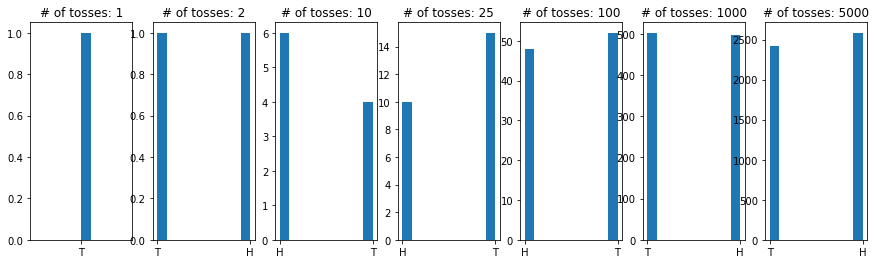

In [4]:
plt.figure(figsize=(15,4))
for i,n in enumerate(res.keys()):
    ax = plt.subplot(1,len(res.keys()),i+1)
    ax.hist(res[n])
    ax.set_title(f"# of tosses: {n}")

In [5]:
# 2 coins
# P("2H")


|1|2|
|:--:|:--:|
|H|H|
|H|T|
|T|H|
|T|T|


In [6]:
ss = ["HH","HT","TH","TT"]
p_hh = ss.count("HH")/len(ss)
p_hh

0.25

In [7]:
# Probability of exactly one Head
p_1h = 2/4
p_gte_1h= 3/4

In [8]:
# A = Head
# B = Another Head
# P(A and B) = P(A) * P(B)

p_hh == p_h * p_h

True

In [9]:
res = {}
for n in [10,100,1000,10000]:
    for _ in range(n):
        c = choice(ss)
        res[n] = res.get(n,[]) + [c]

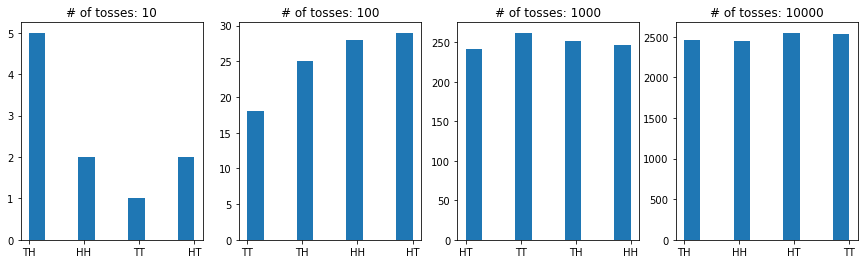

In [10]:
plt.figure(figsize=(15,4))
for i,n in enumerate(res.keys()):
    ax = plt.subplot(1,len(res.keys()),i+1)
    ax.hist(res[n])
    ax.set_title(f"# of tosses: {n}")

In [11]:
# Dice
# 1 die
ss = [1,2,3,4,5,6]
p = 1/6

In [12]:
# 2 dice sum 7
# A = 1, B = 6
# P(A and B)
p = (1/6)**2
p

0.027777777777777776

In [13]:
# P(A or B) = P(A) + P(B)
# A = 1 and 6, B = 2 and 5
p_16_25 = (1/6)**2 + (1/6)**2
p_16_25

0.05555555555555555

In [14]:
# 2 dice sum 7
p_7 = 6 * p
p_7

0.16666666666666666

In [15]:
res = {}
for n in [10,100,1000,10_000,100_000]:
    for _ in range(n):
        d_1 = choice(range(1,7))
        d_2 = choice(range(1,7))
        res[n] = res.get(n,[]) + [d_1+d_2==7]

In [16]:
for k,v in res.items():
    print(f"# of experiments {k}:")
    print(f"Probability of getting 7 in 2 dice: {v.count(True)}/{len(v)}")
    print(v.count(True)/len(v))

# of experiments 10:
Probability of getting 7 in 2 dice: 2/10
0.2
# of experiments 100:
Probability of getting 7 in 2 dice: 18/100
0.18
# of experiments 1000:
Probability of getting 7 in 2 dice: 161/1000
0.161
# of experiments 10000:
Probability of getting 7 in 2 dice: 1716/10000
0.1716
# of experiments 100000:
Probability of getting 7 in 2 dice: 16481/100000
0.16481


#### Probability is always between 0 and 1.
#### $0\le P \le 1$

In [17]:
# Lottery (Loteria Primitiva)
# winning_game = [30, 55, 20, 25, 23, 2]

p = (1/60)*(1/59)*(1/58)*(1/57)*(1/56)*(1/55)

In [18]:
p # This takes order into account

2.7742345254418826e-11

In [19]:
factorial(60)/factorial(54)

36045979200.0

In [20]:
# To calculate the probability in whatever order
# P + P2 + P3 + P4.... for each permutation
p * factorial(6)

1.9974488583181553e-08

In [21]:
(factorial(60)/factorial(54))/factorial(6)

50063860.0

## Permutations and Combinations

In [22]:
# ABCD
# In how many ways can we sort 4 letters?
perm = factorial(4)
perm

24

#### Permutations
$P_{nR} = \frac{n!}{(n-R)!}$

- For permutations, order matters!

#### Combinations
$C_{nR} = \frac{n!}{(n-R)!R!}$

- For combinations, order `does not` matter!

In [23]:
n = 60
R = 6
comb = factorial(n)/(factorial(n-R)*factorial(R))
comb

50063860.0

In [24]:
p_lottery = 1/comb
p_lottery

1.997448858318156e-08

### What is the probability that choosing 3 random letters, we get an A?

In [25]:
# CnR = n!/(n-R)!R!
comb = factorial(26)/(factorial(23)*factorial(3))
comb

2600.0

In [26]:
comb_a = factorial(25)/(factorial(25-2)*factorial(2))
comb_a

300.0

In [27]:
p = comb_a/comb
p

0.11538461538461539

In [28]:
# With Ñ
comb = factorial(27)/(factorial(27-3)*factorial(3))
comb_a = factorial(26)/(factorial(26-2)*factorial(2))
p = comb_a/comb
p

0.1111111111111111

### Permutations with repetition

In [29]:
word = 7
p = factorial(7)
p

5040

In [30]:
word = "ALABAMA"

In [31]:
perm = factorial(7) / ( (factorial(7-7) * factorial(4)))

In [32]:
perm

210.0

In [33]:
word = "MISSISSIPPI"
perm = factorial(11) / ( factorial(11-11) * factorial(4) * factorial(4) * factorial(2) )
perm

34650.0

In [34]:
factorial(11)

39916800

- P(A and B) = P(A∩B)
- P(A or B) = P(A∪B)
### Conditional Probability


- A = Second coin is Head
- B = First coin is Head
### P(A|B) = ?
#### Sample Space
- H H
- H T
- T H # Excluded because first coin is Head
- T T

P(A|B) is 0,5


#### A and B are INDEPENDENT events

In [35]:
# Box with 20 oranges and 10 apples
# Take 2 random fruits
# A -> Second fruit is orange
# B -> First is apple

In [36]:
(20/29)

0.6896551724137931

In [37]:
(10/30)*(20/29)/(10/30)

0.6896551724137931

$P(A|B) = \frac{P(A∩B)}{P(B)}$ 

In [38]:
data = {
    "FT":[34,3,1],
    "PT":[12,8,3]
}

In [39]:
df = pd.DataFrame(data).T
df.columns=["<2","1<x<4","3<x"]
df

,<2,1<x<4,3<x
FT,34,3,1
PT,12,8,3


In [40]:
# A -> Student is PT
# B -> less than 2 abscenses

In [41]:
# P(A∩B)/P(B)

p_AB = 12/61
p_B = 46/61

p_A_given_B = p_AB/p_B
p_A_given_B

0.2608695652173913

In [42]:
12/46

0.2608695652173913

$P(A∩B) = P(B∩A) = P(A|B)P(B) = P(B|A)P(A)$

### Bayes' Theorem

$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

![Monty](https://i.ytimg.com/vi/rn1y-HrmA5c/maxresdefault.jpg)

[Monty Hall Problem](https://en.wikipedia.org/wiki/Monty_Hall_problem)

In [43]:
doors = [1,2,3]
car = choice(doors)


In [44]:
prize = [d==car for d in doors]

In [45]:
choice([i for i in range(len(prize)) if (i!=1) and prize[i]!=True])

2

In [46]:
prize[2]

False

In [47]:
df = pd.DataFrame(columns=["prize", "choice"])
for _ in range(10000):
    prize = choice(range(3))
    participant = choice(range(3))
    df = df.append({"prize":prize,"choice": participant}, ignore_index=True)

In [48]:
df

,prize,choice
0,0,0
1,2,2
2,1,0
3,1,2
4,1,0
...,...,...
9995,0,2
9996,0,1
9997,2,1
9998,2,2


In [49]:
df["keep"]=df.apply(lambda row: row["prize"]==row["choice"],axis=1)

In [50]:
df["change"]=~df["keep"]

In [51]:
df

,prize,choice,keep,change
0,0,0,True,False
1,2,2,True,False
2,1,0,False,True
3,1,2,False,True
4,1,0,False,True
...,...,...,...,...
9995,0,2,False,True
9996,0,1,False,True
9997,2,1,False,True
9998,2,2,True,False


In [52]:
p_k = df.keep.value_counts()[True]/df.shape[0]
p_k

0.3469

In [53]:
p_c = df.change.value_counts()[True]/df.shape[0]
p_c

0.6531

In [54]:
p_k+p_c

1.0

In [55]:
# P(A|B)
# I chose door 1
# A -> Car is in door 1
# B -> Door 2 is open
p_BA=1/2
p_A=1/3
p_B=1/2
p_AB = (p_BA * p_A)/p_B 
p_AB

0.3333333333333333

In [56]:
# P(A|B)
# I chose door 1
# A -> Car is in door 3
# B -> Door 2 is open
p_BA= 1
p_A= 1/3
p_B= 1/2
p_AB = (p_BA * p_A)/p_B 
p_AB

0.6666666666666666

In [57]:
# P(A|B)
# I chose door 1
# A -> Car is in door 2
# B -> Door 2 is open
p_BA= 0
p_A= 1/3
p_B= 1/2
p_AB = (p_BA * p_A)/p_B 
p_AB

0.0

In [58]:
## New Monty Hall with 4 doors
# I choose door 1
# A -> Car in door 1
# B -> Door 2 is open
p_BA= 1/3
p_A= 1/4
p_B= 1/3
p_AB = (p_BA * p_A)/p_B 
p_AB

0.25

In [59]:
# I choose door 1
# A -> Car in door 3
# B -> Door 2 is open
p_BA= 1/2
p_A= 1/4
p_B= 1/3
p_AB = (p_BA * p_A)/p_B 
p_AB

0.375

In [60]:
# I choose door 1
# A -> Car in door 4
# B -> Door 2 is open
p_BA= 1/2
p_A= 1/4
p_B= 1/3
p_AB = (p_BA * p_A)/p_B 
p_AB

0.375

In [61]:
0.25+0.375+0.375

1.0